In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("student_scores.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#The above data set provides tha required information about the student scores and the related fields that affect the scores.

In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [10]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

#Drop Unnamed Column
Dropping the unnamed column because its an extra unwanted column in the data which does not significantly affect the other data present in the dataset.

In [12]:
df=df.drop("Unnamed: 0", axis=1)

In [13]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#Gender Distribution
Knowing the gender distribution provides an idea of how many students whether male or female are present in the college and gives clear idea on further factors that might be affecting their studies. 

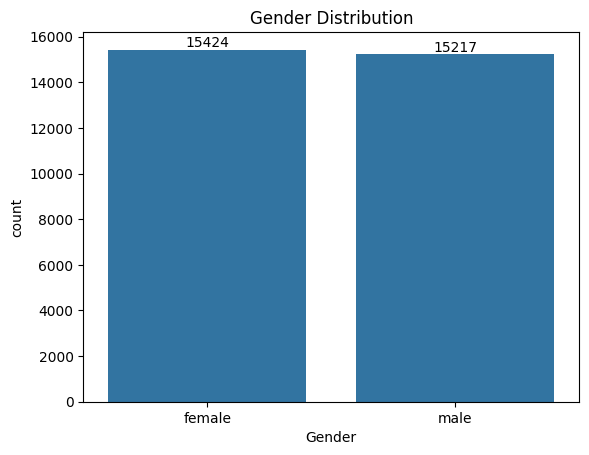

In [24]:
ct = sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
ct.bar_label(ct.containers[0])
plt.show()

From the above gender distribution we can analyse that the number of female enrolled are approximately 207 more than that compared to the males enrolled.

In [17]:
gb= df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


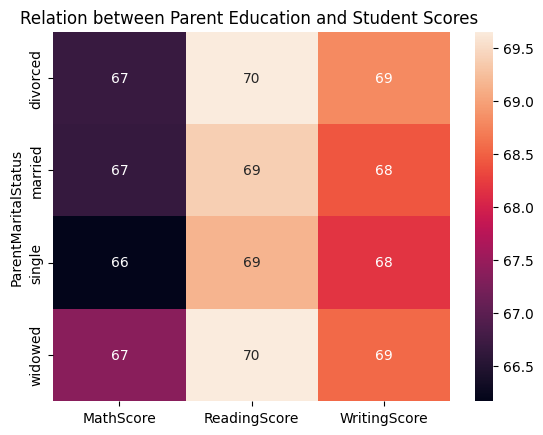

In [25]:
sns.heatmap(gb, annot=True)
plt.title("Relation between Parent Education and Student Scores ")
plt.show()

#from the above chart we can analyse that the parents education has an impact on their children's role in studying. We can notice 
that the parents who have completed their education from some high school the average scores of their children is almost 11 score 
less than the average compared to those children whose parents have completed their master's degree.

In [22]:
gb2= df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb2)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


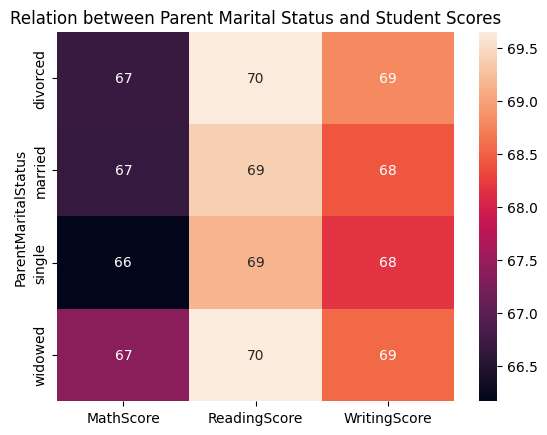

In [27]:
sns.heatmap(gb2, annot=True)
plt.title("Relation between Parent Marital Status and Student Scores")
plt.show()

#from this we analyse that there is negligible impact of the parents maritial status on thier children's scores.

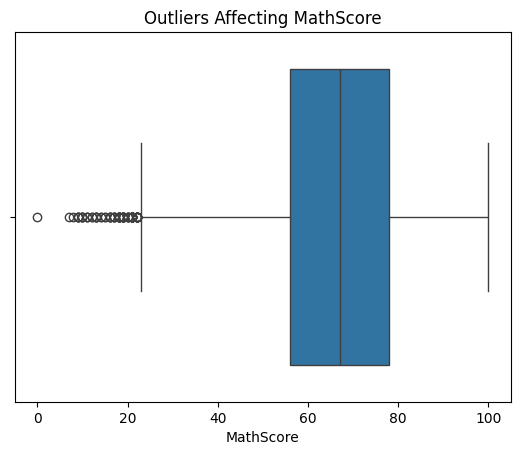

In [28]:
sns.boxplot(data=df, x="MathScore")
plt.title("Outliers Affecting MathScore")
plt.show()

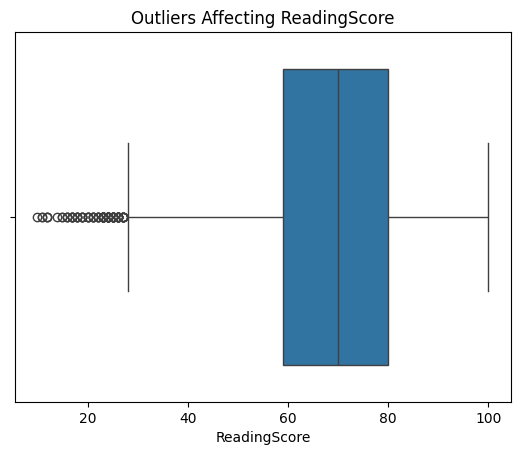

In [29]:
sns.boxplot(data=df, x="ReadingScore")
plt.title("Outliers Affecting ReadingScore")
plt.show()

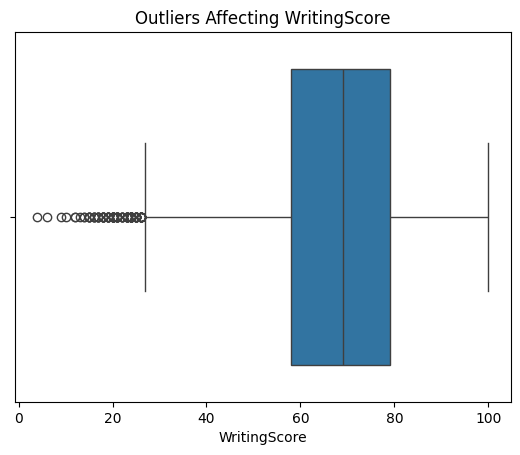

In [30]:
sns.boxplot(data=df, x="WritingScore")
plt.title("Outliers Affecting WritingScore")
plt.show()

#from this we understand that the students face difficulty in Mathematics compared to Writing and Reading since the minimum 
range of mathematics lies between 22-23 compared to Reading or writing which have their minimum range around 28-29 respectively.

In [32]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


DISTRIBUTION OF ETHINIC GROUPS

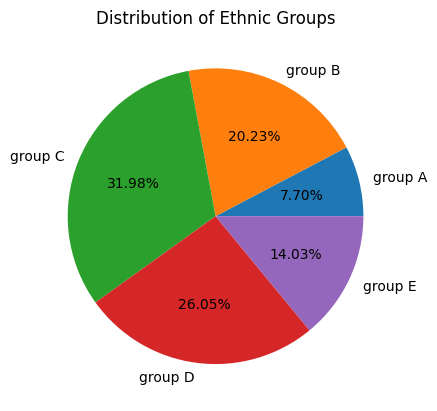

In [45]:
groupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
groupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
groupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
groupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
groupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

l = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.title("Distribution of Ethnic Groups")
plt.pie(mlist, labels = l, autopct = "%1.2f%%")
plt.show()

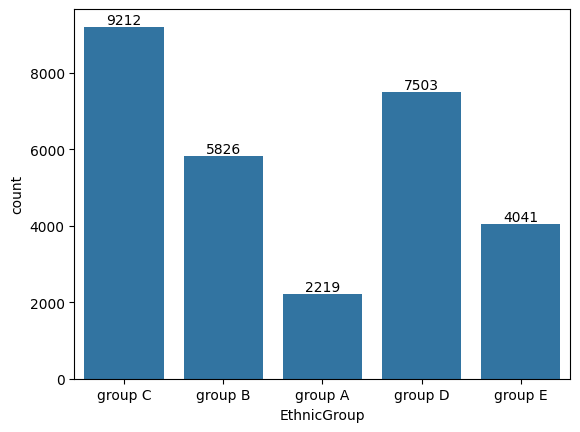

In [49]:
ax = sns.countplot(data = df, x = "EthnicGroup")
ax.bar_label(ax.containers[0])
plt.show()

#From this we can conclude that majority of the students belong to the ethnic group C and the student are mostly weak in Mathematics. Their parents education mostly affects the students grades and their parents marital status has negligible impact on the students scores. 